# Solutions for 1D solute transport in uniform background flow
This notebook shows some examples of one-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code. 

Most 1D solutions available in AdePy are for finite or semi-infinite systems with a first- or third-type boundary condition at the system's inlet. In a finite system, the outlet is close enough so that it affects the concentrations in the zone of interest. This is achieved by specifying a zero concentration gradient at the outlet, which is located at `x = L` with `L` the system's length. In a semi-infinite system, this outlet is placed at `x = Inf`, where the concentration is also equal to zero. In doing so, it is assumed that this outlet is far enough so that it does not influence the area of interest. Solutions for semi-infinite systems are generally easier to solve. Note that in either case, the source is placed at `x = 0` and no meaningful solution exists upgradient from the source, which explains the term "semi-infinite". 

A first-type boundary condition (also called a "constant-concentration" or "specified-concentration") fixes the concentration value at the inlet (at `x = 0`). With a third-type boundary condition, the concentration of the inflowing water with the uniform background flow is specified, so the mass flux across the boundary depends on difference between this specified concentration and the concentration at the other side of the boundary. As such, the concentration at `x = 0` is variable. At larger times, the two boundary types will give similar results. 

In addition to the solutions provided by [Wexler (1992)](https://doi.org/10.3133/twri03B7), two additional solutions are also available for transport in infinite 1D systems. `point1()` simulates a continuous third-type boundary condition at an arbitrary source location. `pulse1()` simulates an instantaneous pulse release of mass (also called a 'slug') at an arbitrary location.

One-dimensional solutions for solute transport are often used to simulate column experiments. At field-scale, 1D solutions may be applicable when the solute is well mixed along the vertical axis, e.g. in a thin aquifer or a fully penetrating source term, and the lateral spread perpendicular to the flow direction is negligible, e.g. at the center of very wide sources. In some cases, 1D solutions are used to simulate the transport along a certain flow line (if the flow velocity remains constant) or with vertical percolation. The outlet of a finite-system may then represent the water-table or a stream.

The solutions for transport in uniform background flow are available as functions from the `uniform` module and can be imported and called as:

In [1]:
from adepy.uniform import finite1

finite1(c0=100.0, x=[5, 10], t=12.5, v=0.6, al=1.0, L=12)

array([83.33698914, 33.09946011])

## Finite system with first-type boundary condition

In this example, 1D solute transport through a column is simulated. A constant concentration is applied at the inlet. The solution is calculated using `adepy.uniform.finite1`. First, the solute is considered conservative. The simulation is then repeated with a solute subjected to linear equilibrium adsorption. This example corresponds to sample problems 1a and 1b in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

In [2]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Reactive solute (1b)')

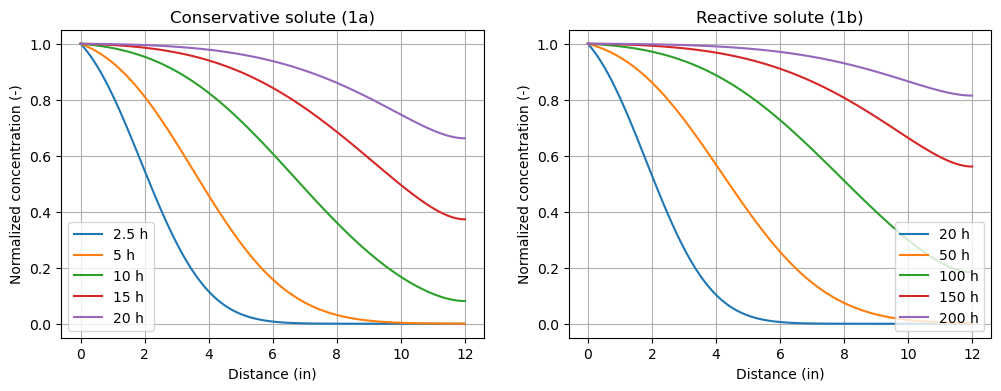

In [3]:
# Import the 1D solution for solute transport in a finite system with uniform background flow and a constant-concentration inlet source
from adepy.uniform import finite1

# Parameters ----
v = 0.6  # linear groundwater flow velocity, in/h
al = 1  # longitudinal dispersivity, in
L = 12  # column length, in
c0 = 1.0  # inlet constant concentration, mg/L

rho_b = 0.047  # dry bulk density, lb/in³
kd = 70  # linear adsorption distribution coefficient, in³/lb
n = 0.45  # porosity, -

# Calculate the retardation coefficient
R = 1 + kd * rho_b / n

# Set the output x and t values
x = np.arange(0, 12.1, 0.1)  # in
ta = [2.5, 5, 10, 15, 20]  # output time for conservative solute simulation, h
tb = [20, 50, 100, 150, 200]  # output time for reactive solute simulation, h

# create empty lists to hold the simulation results
ca = []
cb = []

# set-up the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# loop over the time values, calculate the concentrations, and add to the plots
for i in range(len(ta)):
    ca.append(
        finite1(c0, x, ta[i], v, al, L)
    )  # concentration, mg/L, for conservative solute
    cb.append(
        finite1(c0, x, tb[i], v, al, L, R=R)
    )  # concentration, mg/L, for reactive solute

    ax[0].plot(x, ca[i] / c0, label=f"{ta[i]} h")
    ax[1].plot(x, cb[i] / c0, label=f"{tb[i]} h")

ax[0].set_xlabel("Distance (in)")
ax[0].set_ylabel("Normalized concentration (-)")
ax[0].grid()
ax[0].legend()
ax[0].set_title("Conservative solute (1a)")

ax[1].set_xlabel("Distance (in)")
ax[1].set_ylabel("Normalized concentration (-)")
ax[1].grid()
ax[1].legend(loc="lower right")
ax[1].set_title("Reactive solute (1b)")

## Finite system with third-type boundary condition

Here, example 1a from above is repeated, this time with a Cauchy-type boundary condition at the inlet using `adepy.uniform.finite3`. Comparison with the results of 1a shows the difference between a first-type and third-type boundary inlet condition. This example corresponds to sample problem 2 in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

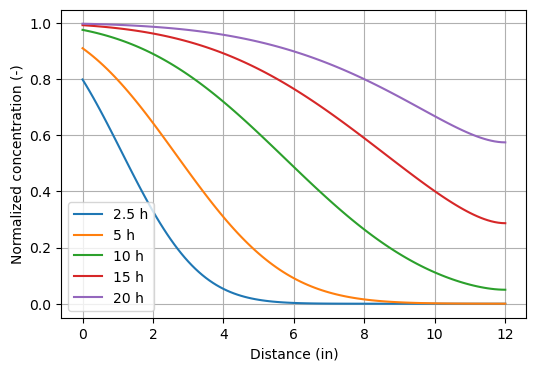

In [4]:
from adepy.uniform import finite3

c = []

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in range(len(ta)):
    c.append(
        finite3(c0, x, ta[i], v, al, L)  # calculate the concentrations
    )
    ax.plot(x, c[i] / c0, label=f"{ta[i]} h")

ax.set_xlabel("Distance (in)")
ax.set_ylabel("Normalized concentration (-)")
ax.grid()
ax.legend()

## Semi-infinite system with first-type boundary condition

The example below shows 1D solute transport in a semi-infinite system with a constant-concentration boundary at the inlet, using `adepy.uniform.seminf1`. First, a conservative solute is introduced in a long soil column. Secondly, the fate of a reactive solute introduced in the column is simulated where the species is subjected to linear equilibrium adsorption and first-order decay. These examples correspond to sample problems 3a and 3b in [Wexler (1992)](https://doi.org/10.3133/twri03B7). Comparison with the concentration profiles of the finite system with a first-type boundary shown above illustrates the difference between finite and semi-infinite systems.

Text(0.5, 1.0, 'Reactive solute (3b)')

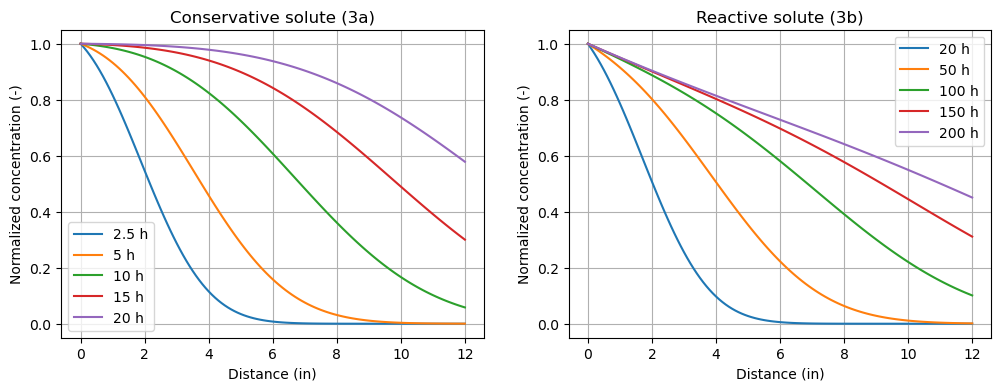

In [5]:
from adepy.uniform import seminf1

# Parameters ----
v = 0.6  # linear groundwater flow velocity, in/h
al = 1  # longitudinal dispersivity, in
c0 = 1.0  # inlet constant concentration, mg/L

rho_b = 0.047  # dry bulk density, lb/in³
kd = 70  # linear adsorption distribution coefficient, in³/lb
n = 0.45  # porosity, -
t_half = 7.6 * 24  # half-life of solute, h

# Calculate the retardation coefficient and the first-order decay constant
R = 1 + kd * rho_b / n
lamb = np.log(2) / t_half

# Set the output x and t values
x = np.arange(0, 12.1, 0.1)  # in
ta = [2.5, 5, 10, 15, 20]  # output time for conservative solute simulation, h
tb = [20, 50, 100, 150, 200]  # output time for reactive solute simulation, h

# create empty lists to hold the simulation results
ca = []
cb = []

# set-up the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# loop over the time values, calculate the concentrations, and add to the plots
for i in range(len(ta)):
    ca.append(
        seminf1(c0, x, ta[i], v, al)
    )  # concentration, mg/L, for conservative solute
    cb.append(
        seminf1(c0, x, tb[i], v, al, R=R, lamb=lamb)
    )  # concentration, mg/L, for reactive solute

    ax[0].plot(x, ca[i] / c0, label=f"{ta[i]} h")
    ax[1].plot(x, cb[i] / c0, label=f"{tb[i]} h")

ax[0].set_xlabel("Distance (in)")
ax[0].set_ylabel("Normalized concentration (-)")
ax[0].grid()
ax[0].legend()
ax[0].set_title("Conservative solute (3a)")

ax[1].set_xlabel("Distance (in)")
ax[1].set_ylabel("Normalized concentration (-)")
ax[1].grid()
ax[1].legend(loc="upper right")
ax[1].set_title("Reactive solute (3b)")

## Semi-infinite system with third-type boundary condition

For the final example, the problem shown above for the conservative solute in a semi-infinite system is repeated but this time a third-type boundary condition at the inlet is used. This is simulated using `adepy.uniform.seminf3`, and corresponds to sample problem 4 in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

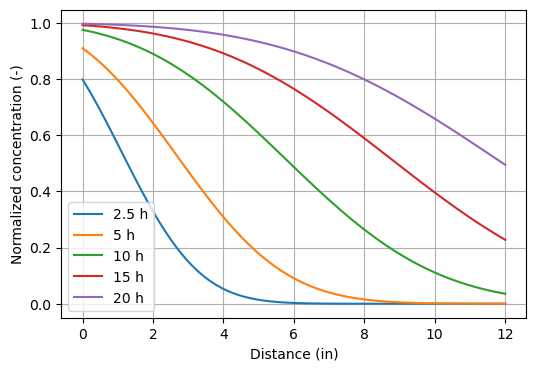

In [6]:
from adepy.uniform import seminf3

c = []

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in range(len(ta)):
    c.append(
        seminf3(c0, x, ta[i], v, al)  # calculate the concentrations
    )
    ax.plot(x, c[i] / c0, label=f"{ta[i]} h")

ax.set_xlabel("Distance (in)")
ax.set_ylabel("Normalized concentration (-)")
ax.grid()
ax.legend()

## Infinite system with a point source

The `point1()` algorithm simulates the fate of a contaminant released at an arbitrary point location through a continuous point source in an infinite 1D system. The source term is represented by a source concentration `c0` and an infiltration flux `qi` $[L/T]$.

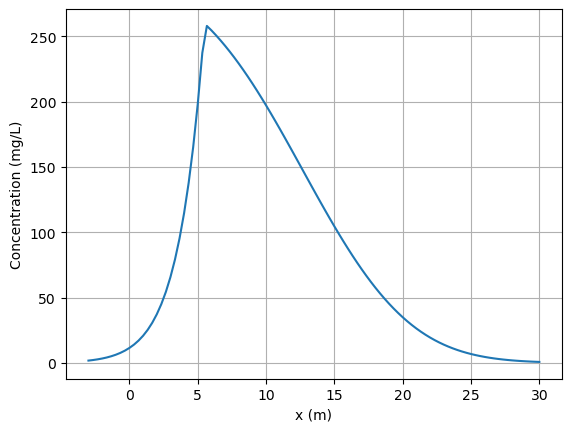

In [7]:
from adepy.uniform.oneD import point1

v = 0.05  # linear groundwater flow velocity, m/d
al = 2.0  # longitudinal dispersivity, m
n = 0.2  # aquifer porosity, -

c0 = 2.5  # source concentration, mg/L
qi = 1.2  # source infiltration flux, m/d
xc = 5.5  # x-coordinate of the source, m

x = np.linspace(-3, 30, 100)
t = 180

c = point1(c0, x, t, v, n, al, qi, xc)

plt.plot(x, c)
plt.xlabel("x (m)")
plt.ylabel("Concentration (mg/L)")
plt.grid()

## Infinite system with a pulse source

An instantaneous pulse release of mass from a point source in an infinite 1D system can be simulated with `pulse1()`. The source can be placed anywhere in the system.


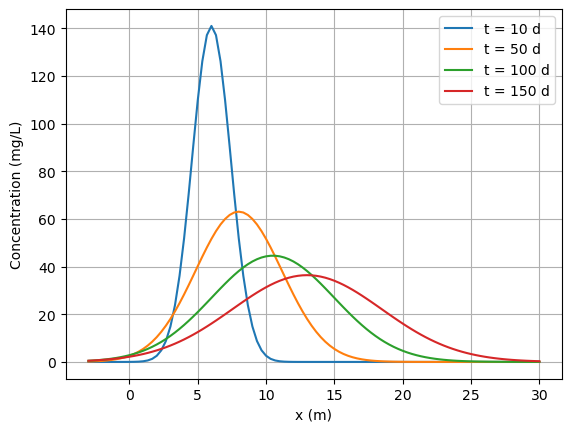

In [8]:
from adepy.uniform.oneD import pulse1

m0 = 100  # source mass, mg

c = []
t = [10, 50, 100, 150]
for i, ti in enumerate(t):
    c.append(pulse1(m0, x, ti, v, n, al, xc))
    plt.plot(x, c[i], label=f"t = {ti} d")

plt.xlabel("x (m)")
plt.ylabel("Concentration (mg/L)")
plt.grid()
plt.legend()